In [1]:
!pip install VESIcal
import sys
sys.path.append(r'..')
import VESIcal as v
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
import warnings as w

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
#plt.rcParams["mathtext.default"] = "regular"
#plt.rcParams["mathtext.fontset"] = "arial"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 12 # Overall title
plt.rcParams["axes.labelsize"] = 12 # Axes labels
plt.rcParams["legend.fontsize"]= 14

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Foreloop for varying temps, 

In [3]:

with w.catch_warnings():
    w.simplefilter('ignore')
    T=np.array([700, 725, 750, 775,  800, 825, 850, 875, 900, 925, 950, 975, 1000])

    
    
    Psat_Mono_MagmaSat_1000=np.empty(len(T), dtype=float)
    Psat_Mono_Liu_1000=np.empty(len(T), dtype=float)


    for i in range(0, len(T)):

    
        Mono =v.Sample({'SiO2':  77.19,
 'TiO2':     0.06,
 'Al2O3':    12.8,
 'Fe2O3':     0.2611085,
 'FeO':       0.705,
 'MgO':      0.03,
 'CaO':      0.53,
 'Na2O':      3.98,
 'K2O':       4.65,
'P2O5':     0.0,
    'CO2': 0.1,
    'H2O': 1}, default_normalization='none')
        Psat_Mono_MagmaSat_1000[i]=v.calculate_saturation_pressure(sample=Mono,  temperature=T[i]).result
        Psat_Mono_Liu_1000[i]=v.calculate_saturation_pressure(sample=Mono, model='Liu',  temperature=T[i]).result

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Water-rich example

In [4]:

with w.catch_warnings():
    w.simplefilter('ignore')
    T=np.array([700, 725, 750, 775,  800, 825, 850, 875, 900, 925, 950, 975, 1000])

    
    
    Psat_Mono_MagmaSat_6=np.empty(len(T), dtype=float)
    Psat_Mono_Liu_6=np.empty(len(T), dtype=float)


    for i in range(0, len(T)):

    
        Mono =v.Sample({'SiO2':  77.19,
 'TiO2':     0.06,
 'Al2O3':    12.8,
 'Fe2O3':     0.2611085,
 'FeO':       0.705,
 'MgO':      0.03,
 'CaO':      0.53,
 'Na2O':      3.98,
 'K2O':       4.65,
'P2O5':     0.0,
    'CO2': 0.01,
    'H2O': 6}, default_normalization='none')
        Psat_Mono_MagmaSat_6[i]=v.calculate_saturation_pressure(sample=Mono,  temperature=T[i]).result
        Psat_Mono_Liu_6[i]=v.calculate_saturation_pressure(sample=Mono, model='Liu',  temperature=T[i]).result

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Smoothing MagmaSat

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


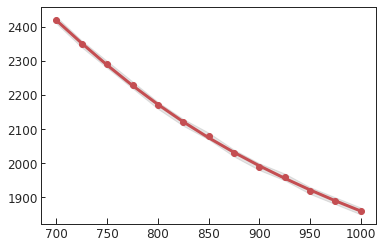

In [5]:
plt.fill_between(T, Psat_Mono_MagmaSat_1000-10, Psat_Mono_MagmaSat_1000+10, color='grey', alpha=0.2)
Pf_Magmasat_1000 = np.poly1d(np.polyfit(T,  Psat_Mono_MagmaSat_1000, 5))
Px_new_Magmasat_1000 = T
Py_new_Magmasat_1000 = Pf_Magmasat_1000(Px_new_Magmasat_1000)
plt.plot(Px_new_Magmasat_1000, Py_new_Magmasat_1000, '-r')
plt.plot(T, Psat_Mono_MagmaSat_1000, '.r')



/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


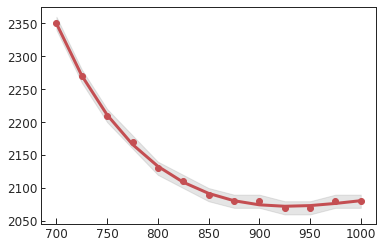

In [6]:
plt.fill_between(T, Psat_Mono_MagmaSat_6-10, Psat_Mono_MagmaSat_6+10, color='grey', alpha=0.2)
Pf_Magmasat_6 = np.poly1d(np.polyfit(T,  Psat_Mono_MagmaSat_6, 5))
Px_new_Magmasat_6 = T
Py_new_Magmasat_6 = Pf_Magmasat_6(Px_new_Magmasat_6)
plt.plot(Px_new_Magmasat_6, Py_new_Magmasat_6, '-r')
plt.plot(T, Psat_Mono_MagmaSat_6, '.r')

In [7]:
# Importing Papale
Papale=pd.read_excel(r'../Papale_Inputs_for_each_Figure.xlsx', sheet_name='Temp_SatP_Mono',  index_col=None)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Importing VCR
VCR=pd.read_excel(r'../Papale_Inputs_for_each_Figure.xlsx', sheet_name='Temp_SatP_VCR',  index_col=None)

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


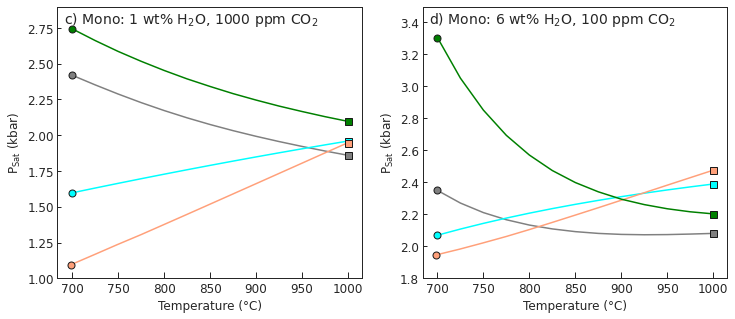

In [9]:
b=1.5
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5), sharex=True) # adjust dimensions of figure here
ax1.plot(T, 0.001*Py_new_Magmasat_1000, '-', color='grey', linewidth=b)
ax1.plot(VCR['Temp(¡C)_1000'], 0.001*VCR['P (bars)_1000'], '-', color='lightsalmon',linewidth=b)
ax1.plot(T, 0.001*Psat_Mono_Liu_1000, '-', color='cyan', linewidth=b)

ax1.plot(T[0], 0.001*Py_new_Magmasat_1000[0], 'ok', mfc='grey', markersize=7)
ax1.plot(T[0], 0.001*Psat_Mono_Liu_1000[0], 'ok', mfc='cyan', markersize=7)
ax1.plot(VCR['Temp(¡C)_1000'].iloc[0], 0.001*VCR['P (bars)_1000'].iloc[0], 'ok', mfc='lightsalmon', markersize=7)


ax1.plot(T[-1], 0.001*Py_new_Magmasat_1000[-1], 'sk', mfc='grey', markersize=7)
ax1.plot(T[-1], 0.001*Psat_Mono_Liu_1000[-1], 'sk', mfc='cyan', markersize=7)
ax1.plot(VCR['Temp(¡C)_1000'].iloc[-1], 0.001*VCR['P (bars)_1000'].iloc[-1], 'sk', mfc='lightsalmon', markersize=7)

ax1.plot(Papale.loc[Papale['Sample']=="Mono_1000", "Temp"], 0.01*Papale.loc[Papale['Sample']=="Mono_1000", "Pressure (Mpa)"],
         '-', color='green', linewidth=b)
ax1.plot(Papale.loc[Papale['Sample']=="Mono_1000", "Temp"].iloc[0], 0.01*Papale.loc[Papale['Sample']=="Mono_1000", "Pressure (Mpa)"].iloc[0],
         'ok', mfc='green', markersize=7)
ax1.plot(Papale.loc[Papale['Sample']=="Mono_1000", "Temp"].iloc[-1], 0.01*Papale.loc[Papale['Sample']=="Mono_1000", "Pressure (Mpa)"].iloc[-1],
         'sk', mfc='green', markersize=7)
## ---- higher water

ax2.plot(T, 0.001*Py_new_Magmasat_6, '-', color='grey', linewidth=b)
ax2.plot(T, 0.001*Psat_Mono_Liu_6, '-', color='cyan', linewidth=b)
ax2.plot(VCR['Temp(¡C)_6'], 0.001*VCR['P (bars)_6'], '-', color='lightsalmon',linewidth=b)

ax2.plot(T[0], 0.001*Py_new_Magmasat_6[0], 'ok', mfc='grey', markersize=7)
ax2.plot(T[0], 0.001*Psat_Mono_Liu_6[0], 'ok', mfc='cyan', markersize=7)
ax2.plot(VCR['Temp(¡C)_6'].iloc[0], 0.001*VCR['P (bars)_6'].iloc[0], 'ok', mfc='lightsalmon', markersize=7)


ax2.plot(T[-1], 0.001*Py_new_Magmasat_6[-1], 'sk', mfc='grey', markersize=7)
ax2.plot(T[-1], 0.001*Psat_Mono_Liu_6[-1], 'sk', mfc='cyan', markersize=7)
ax2.plot(VCR['Temp(¡C)_6'].iloc[-1], 0.001*VCR['P (bars)_6'].iloc[-1], 'sk', mfc='lightsalmon', markersize=7)

ax2.plot(Papale.loc[Papale['Sample']=="Mono_6", "Temp"], 0.01*Papale.loc[Papale['Sample']=="Mono_6", "Pressure (Mpa)"],
         '-', color='green', linewidth=b)
ax2.plot(Papale.loc[Papale['Sample']=="Mono_6", "Temp"].iloc[0], 0.01*Papale.loc[Papale['Sample']=="Mono_6", "Pressure (Mpa)"].iloc[0],
         'ok', mfc='green', markersize=7)
ax2.plot(Papale.loc[Papale['Sample']=="Mono_6", "Temp"].iloc[-1], 0.01*Papale.loc[Papale['Sample']=="Mono_6", "Pressure (Mpa)"].iloc[-1],
         'sk', mfc='green', markersize=7)

ax1.set_xlabel('Temperature (°C)')
ax2.set_xlabel('Temperature (°C)')
ax1.set_ylabel('P$_{Sat}$ (kbar)')
ax2.set_ylabel('P$_{Sat}$ (kbar)')
ax1.annotate("c) Mono: 1 wt% H$_2$O, 1000 ppm CO$_2$", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=14) # Dixon morb
ax2.annotate("d) Mono: 6 wt% H$_2$O, 100 ppm CO$_2$", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=14) # GGMORB

ax1.set_ylim([1, 2.9])
ax2.set_ylim([1.8, 3.5])
fig.savefig('Fig14_SatP_Temp_Rhyolite.svg', transparent=True)

# Discrepency calculations

## Papale

In [10]:
P_H=Papale.loc[Papale['Sample']=="Mono_6", "Pressure (Mpa)"].iloc[-1]/Papale.loc[Papale['Sample']=="Mono_6", "Pressure (Mpa)"].iloc[0]
P_C=Papale.loc[Papale['Sample']=="Mono_1000", "Pressure (Mpa)"].iloc[-1]/Papale.loc[Papale['Sample']=="Mono_1000", "Pressure (Mpa)"].iloc[0]
print(P_C, P_H)

0.7642128279883382 0.6663641863278886


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Liu

In [11]:
D_H=Psat_Mono_Liu_6[-1]/Psat_Mono_Liu_6[0]
D_C=Psat_Mono_Liu_1000[-1]/Psat_Mono_Liu_1000[0]
print(D_C, D_H)

1.2265067571382724 1.1547118282592617


# MagmaSat

In [12]:
M_H=Py_new_Magmasat_6[-1]/Py_new_Magmasat_6[0]
M_C=Py_new_Magmasat_1000[-1]/Py_new_Magmasat_1000[0]
print(M_C, M_H)

0.768744506162354 0.8855734327006354


# VCR

In [13]:
V_H=VCR['P (bars)_6'].iloc[-1]/VCR['P (bars)_6'].iloc[0]
V_C=VCR['P (bars)_1000'].iloc[-1]/VCR['P (bars)_1000'].iloc[0]
print(V_C, V_H)

1.7772630078403422 1.2718699839486356


# Calculaing isobars for range of temperatures

In [14]:
Mono =v.Sample({'SiO2':  77.19,
 'TiO2':     0.06,
 'Al2O3':    12.8,
 'Fe2O3':     0.2611085,
 'FeO':       0.705,
 'MgO':      0.03,
 'CaO':      0.53,
 'Na2O':      3.98,
 'K2O':       4.65,
'P2O5':     0.0})

pressures=[500, 2000]

In [15]:
isobars_MagmaSat_700, isopleths_MagmaSat_700 = v.calculate_isobars_and_isopleths(sample=Mono, smooth_isobars=False,
                                            temperature=700,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result
smoothed_isobars_MagmaSat_700 = v.vplot.smooth_isobars_and_isopleths(isobars_MagmaSat_700)


Calculating isobar at 500 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!


/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning: temperature (700.0 oC) is outside the calibration range of the MagmaSat model (800.0-1400.0 oC). 
  w.warn(self.calib_check, RuntimeWarning)


In [16]:
isobars_MagmaSat_900, isopleths_MagmaSat_900 = v.calculate_isobars_and_isopleths(sample=Mono, smooth_isobars=False,
                                            temperature=900,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result
smoothed_isobars_MagmaSat_900 = v.vplot.smooth_isobars_and_isopleths(isobars_MagmaSat_900)


Calculating isobar at 500 bars
 Calculating isopleth at XH2Ofluid = 0.01               

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!


In [17]:
isobars_Liu_900, isopleths_Liu_900 = v.calculate_isobars_and_isopleths(sample=Mono, smooth_isobars=False,
                                            temperature=900,
                                            pressure_list=pressures, model='Liu', 
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result

isobars_Liu_700, isopleths_Liu_700 = v.calculate_isobars_and_isopleths(sample=Mono, smooth_isobars=False,
                                            temperature=700,
                                            pressure_list=pressures, model='Liu', 
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Papale isobars

In [19]:
PapaleIsobars=pd.read_excel(r'../Papale_Inputs_for_each_Figure.xlsx', sheet_name='Temp_Papale_Isobars_Mono',  index_col=None)

In [20]:
VCR_Isobars=pd.read_excel(r'../Papale_Inputs_for_each_Figure.xlsx', sheet_name='Temp_VCR_Isobars',  index_col=None)

In [21]:
x_50MPa_700=PapaleIsobars.loc[PapaleIsobars['Sample']=="Mono_05kbar_700", 'Diss H2O']
y_50MPa_700=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Mono_05kbar_700", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_50MPa_700, y_50MPa_700, 5))
P_x_50MPa_700_new = np.linspace(min(x_50MPa_700), max(x_50MPa_700), 50)
P_y_50MPa_700_new = Pf(P_x_50MPa_700_new)
plt.plot(x_50MPa_700, y_50MPa_700, '.k')
plt.plot(P_x_50MPa_700_new, P_y_50MPa_700_new, '-k')

x_50MPa_900=PapaleIsobars.loc[PapaleIsobars['Sample']=="Mono_05kbar_900", 'Diss H2O']
y_50MPa_900=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Mono_05kbar_900", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_50MPa_900, y_50MPa_900, 5))
P_x_50MPa_900_new = np.linspace(min(x_50MPa_900), max(x_50MPa_900), 50)
P_y_50MPa_900_new = Pf(P_x_50MPa_900_new)
plt.plot(x_50MPa_900, y_50MPa_900, '.k')
plt.plot(P_x_50MPa_900_new, P_y_50MPa_900_new, '-k')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


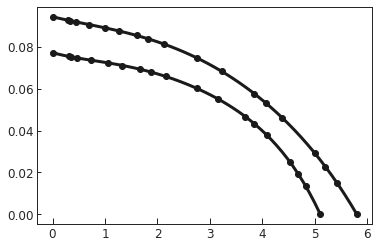

In [22]:

x_200MPa_700=PapaleIsobars.loc[PapaleIsobars['Sample']=="Mono_2kbar_700", 'Diss H2O']
y_200MPa_700=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Mono_2kbar_700", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_200MPa_700, y_200MPa_700, 5))
P_x_200MPa_700_new = np.linspace(min(x_200MPa_700), max(x_200MPa_700), 50)
P_y_200MPa_700_new = Pf(P_x_200MPa_700_new)
plt.plot(x_200MPa_700, y_200MPa_700, '.k')
plt.plot(P_x_200MPa_700_new, P_y_200MPa_700_new, '-k')

x_200MPa_900=PapaleIsobars.loc[PapaleIsobars['Sample']=="Mono_2kbar_900", 'Diss H2O']
y_200MPa_900=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Mono_2kbar_900", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_200MPa_900, y_200MPa_900, 5))
P_x_200MPa_900_new = np.linspace(min(x_200MPa_900), max(x_200MPa_900), 50)
P_y_200MPa_900_new = Pf(P_x_200MPa_900_new)
plt.plot(x_200MPa_900, y_200MPa_900, '.k')
plt.plot(P_x_200MPa_900_new, P_y_200MPa_900_new, '-k')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


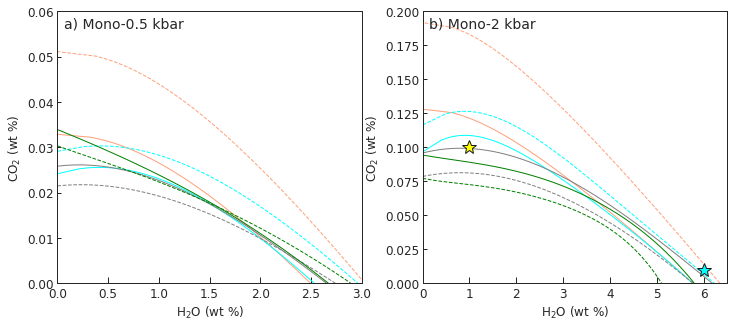

In [23]:
b=1
a=0.7
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5)) # adjust dimensions of figure here

# VCR------------------------------
ax1.plot(VCR_Isobars['Wt%H2O_05kbar_700'], 10**(-4)*VCR_Isobars['PPMCO2_05kbar_700'],  linestyle='dashed', color='lightsalmon', linewidth=b)
ax1.plot(VCR_Isobars['Wt%H2O_05kbar_900'], 10**(-4)*VCR_Isobars['PPMCO2_05kbar_900'],  linestyle='solid', color='lightsalmon', linewidth=b)

ax2.plot(VCR_Isobars['Wt%H2O_2kbar_700'], 10**(-4)*VCR_Isobars['PPMCO2_2kbar_700'],  linestyle='dashed', color='lightsalmon', linewidth=b)
ax2.plot(VCR_Isobars['Wt%H2O_2kbar_900'], 10**(-4)*VCR_Isobars['PPMCO2_2kbar_900'],  linestyle='solid', color='lightsalmon', linewidth=b)

# Liu------------------------------------------

ax1.plot(isobars_Liu_700['H2O_liq'].iloc[0:101], isobars_Liu_700['CO2_liq'].iloc[0:101], 
         label='700 bars', color='cyan', linestyle='dashed', linewidth=b)
ax1.plot(isobars_Liu_900['H2O_liq'].iloc[0:101], isobars_Liu_900['CO2_liq'].iloc[0:101], 
         label='700 bars', color='cyan', linestyle='solid', linewidth=b)


ax2.plot(isobars_Liu_700['H2O_liq'].iloc[101:], isobars_Liu_700['CO2_liq'].iloc[101:], 
         label='700 bars', color='cyan', linestyle='dashed', linewidth=b)
ax2.plot(isobars_Liu_900['H2O_liq'].iloc[101:], isobars_Liu_900['CO2_liq'].iloc[101:], 
         label='700 bars', color='cyan', linestyle='solid', linewidth=b)
 
         
ax1.plot(smoothed_isobars_MagmaSat_700['H2O_liq'].iloc[0:50], smoothed_isobars_MagmaSat_700['CO2_liq'].iloc[0:50], 
         label='700 bars', color='grey', linestyle='dashed', linewidth=b)
ax1.plot(smoothed_isobars_MagmaSat_900['H2O_liq'].iloc[0:50], smoothed_isobars_MagmaSat_900['CO2_liq'].iloc[0:50], 
         label='700 bars', color='grey', linestyle='solid', linewidth=b)


ax2.plot(smoothed_isobars_MagmaSat_700['H2O_liq'].iloc[50:100], smoothed_isobars_MagmaSat_700['CO2_liq'].iloc[50:100], 
         label='700 bars', color='grey', linestyle='dashed', linewidth=b)
ax2.plot(smoothed_isobars_MagmaSat_900['H2O_liq'].iloc[50:100], smoothed_isobars_MagmaSat_900['CO2_liq'].iloc[50:100], 
         label='700 bars', color='grey', linestyle='solid', linewidth=b)
# Papale
ax1.plot(P_x_50MPa_700_new, P_y_50MPa_700_new, color='green', linestyle='dashed', linewidth=b)
ax1.plot(P_x_50MPa_900_new, P_y_50MPa_900_new, color='green', linestyle='solid', linewidth=b)

ax2.plot(P_x_200MPa_700_new, P_y_200MPa_700_new, color='green', linestyle='dashed', linewidth=b)
ax2.plot(P_x_200MPa_900_new, P_y_200MPa_900_new, color='green', linestyle='solid', linewidth=b)    
    
ax2.plot(6, 0.01, '*k', mfc="cyan", ms=15)
ax2.plot(1, 0.1, '*k', mfc="yellow", ms=15)
ax1.set_xlim([0, 3])
ax2.set_xlim([0, 6.5])
ax1.set_ylim([0, 0.06])
ax2.set_ylim([0, 0.2])
ax1.set_ylabel('CO$_2$ (wt %)')
ax2.set_ylabel('CO$_2$ (wt %)')
ax1.set_xlabel('H$_2$O (wt %)')
ax2.set_xlabel('H$_2$O (wt %)')

ax1.annotate("a) Mono-0.5 kbar", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=14) # Dixon morb
ax2.annotate("b) Mono-2 kbar", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=14) # GGMORB


fig.savefig('Rhyolite_isobars_Temp.svg', transparent=True)